# Data Analysis on Prosper loan data
## by Sumit K Mahato

## Preliminary Wrangling

> This document explores various variables related to loan to borrowers. The dataset consist of 113937 observations and 81 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import warnings
warnings.filterwarnings("ignore")  #Hide warning messages

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
os.getcwd()

'C:\\Users\\smahato\\Desktop\\Udacity_data_visualization project'

In [3]:
os.chdir('C:\\Users\\smahato\\Desktop\\Udacity_data_visualization project')

In [4]:
df_loan = pd.read_csv('C:\\Users\\smahato\\Desktop\\Udacity_data_visualization project\\prosperLoanData.csv')

In [5]:
#Show all rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#Overview of data
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#rename columns with spaces
df_loan.rename(columns = {"ProsperRating (numeric)":"ProsperRating(numeric)", "ProsperRating (Alpha)":"ProsperRating(Alpha)", 
                "ListingCategory (numeric)":"ListingCategory(numeric)", 
                "TradesNeverDelinquent (percentage)":"TradesNeverDelinquent(percentage)"},inplace = True)

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
#shape of the dataframe
df_loan.shape

(113937, 81)

In [10]:
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating(numeric),ProsperRating(Alpha),ProsperScore,ListingCategory(numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent(percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Exe

In [11]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating(numeric),ProsperScore,ListingCategory(numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent(percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.

In [12]:
#Subset the dataframe to contain only features of interest

df_loan_sub = df_loan[["ListingNumber","ListingCreationDate","Term","LoanStatus","BorrowerAPR",
                       "ListingCategory(numeric)", "BorrowerState","EmploymentStatus",
                       "EmploymentStatusDuration", "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper","TotalInquiries",
                       "FirstRecordedCreditLine", "TotalCreditLinespast7years", "RevolvingCreditBalance", "DebtToIncomeRatio",
                       "IncomeRange"]]

In [13]:
df_loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingNumber               113937 non-null  int64  
 1   ListingCreationDate         113937 non-null  object 
 2   Term                        113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   BorrowerAPR                 113912 non-null  float64
 5   ListingCategory(numeric)    113937 non-null  int64  
 6   BorrowerState               108422 non-null  object 
 7   EmploymentStatus            111682 non-null  object 
 8   EmploymentStatusDuration    106312 non-null  float64
 9   IsBorrowerHomeowner         113937 non-null  bool   
 10  CreditScoreRangeLower       113346 non-null  float64
 11  CreditScoreRangeUpper       113346 non-null  float64
 12  TotalInquiries              112778 non-null  float64
 13  FirstRecordedC

In [14]:
#ListingCreationDate and FirstRecordedCreditLine changed to timestamp and only datepart was extracted from the timestamp

df_loan_sub[ 'FirstRecordedCreditLine'] = pd.to_datetime(df_loan_sub['FirstRecordedCreditLine'], format= '%Y/%m/%d').dt.date
df_loan_sub[ 'FirstRecordedCreditLine'] = pd.to_datetime(df_loan_sub['FirstRecordedCreditLine'], format= '%Y/%m/%d')

df_loan_sub['ListingCreationDate'] = pd.to_datetime(df_loan_sub['ListingCreationDate'], format= '%Y/%m/%d').dt.date
df_loan_sub['ListingCreationDate'] = pd.to_datetime(df_loan_sub['ListingCreationDate'], format= '%Y/%m/%d')

In [15]:
#The age of credit line of the borrower

df_loan_sub['CreditLineAge'] = (df_loan_sub.ListingCreationDate - df_loan_sub.FirstRecordedCreditLine).dt.days

In [16]:
#Check the format of the columns of the resulting dataframe

df_loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingNumber               113937 non-null  int64         
 1   ListingCreationDate         113937 non-null  datetime64[ns]
 2   Term                        113937 non-null  int64         
 3   LoanStatus                  113937 non-null  object        
 4   BorrowerAPR                 113912 non-null  float64       
 5   ListingCategory(numeric)    113937 non-null  int64         
 6   BorrowerState               108422 non-null  object        
 7   EmploymentStatus            111682 non-null  object        
 8   EmploymentStatusDuration    106312 non-null  float64       
 9   IsBorrowerHomeowner         113937 non-null  bool          
 10  CreditScoreRangeLower       113346 non-null  float64       
 11  CreditScoreRangeUpper       113346 non-

In [99]:
df_loan_sub.describe()

,ListingNumber,Term,BorrowerAPR,ListingCategory(numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,TotalInquiries,TotalCreditLinespast7years,RevolvingCreditBalance,DebtToIncomeRatio,CreditLineAge
count,1.139370e+05,113937.000000,113912.000000,113937.000000,106312.000000,113346.000000,113346.000000,112778.000000,113240.000000,1.063330e+05,105383.000000,113240.000000
mean,6.278857e+05,40.830248,0.218828,2.774209,96.071582,685.567731,704.567731,5.584405,26.754539,1.759871e+04,0.275947,6089.199117
std,3.280762e+05,10.436212,0.080364,3.996797,94.480605,66.458275,66.458275,6.429946,13.637871,3.293640e+04,0.551759,2909.954797
min,4.000000e+00,12.000000,0.006530,0.000000,0.000000,0.000000,19.000000,0.000000,2.000000,0.000000e+00,0.000000,7.000000
25%,4.009190e+05,36.000000,0.156290,1.000000,26.000000,660.000000,679.000000,2.000000,17.000000,3.121000e+03,0.140000,4103.750000
50%,6.005540e+05,36.000000,0.209760,1.000000,67.000000,680.000000,699.000000,4.000000,25.000000,8.549000e+03,0.220000,5709.000000
75%,8.926340e+05,36.000000,0.283810,3.000000,137.000000,720.000000,739.000000,7.000000,35.000000,1.952100e+04,0.320000,7720.250000
max,1.255725e+06,60.000000,0.512290,20.000000,755.000000,880.000000,899.000000,379.000000,136.000000,1.435667e+06,10.010000,23023.000000


In [17]:
df_loan_sub.head(10)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory(numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,TotalInquiries,FirstRecordedCreditLine,TotalCreditLinespast7years,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,CreditLineAge
0,193129,2007-08-26,36,Completed,0.16516,0,CO,Self-employed,2.0,True,640.0,659.0,3.0,2001-10-11,12.0,0.0,0.17,"$25,000-49,999",2145.0
1,1209647,2014-02-27,36,Current,0.12016,2,CO,Employed,44.0,False,680.0,699.0,5.0,1996-03-18,29.0,3989.0,0.18,"$50,000-74,999",6555.0
2,81716,2007-01-05,36,Completed,0.28269,0,GA,Not available,NaN,False,480.0,499.0,1.0,2002-07-27,3.0,NaN,0.06,Not displayed,1623.0
3,658116,2012-10-22,36,Current,0.12528,16,GA,Employed,113.0,True,800.0,819.0,1.0,1983-02-28,29.0,1444.0,0.15,"$25,000-49,999",10829.0
4,909464,2013-09-14,36,Current,0.24614,2,MN,Employed,44.0,True,680.0,699.0,9.0,2004-02-20,49.0,6193.0,0.26,"$100,000+",3494.0
5,1074836,2013-12-14,60,Current,0.15425,1,NM,Employed,82.0,True,740.0,759.0,2.0,1973-03-01,49.0,62999.0,0.36,"$100,000+",14898.0
6,750899,2013-04-12,36,Current,0.31032,1,KS,Employed,172.0,False,680.0,699.0,0.0,2000-09-29,20.0,5812.0,0.27,"$25,000-49,999",4578.0
7,768193,2013-05-05,36,Current,0.23939,2,CA,Employed,103.0,False,700.0,719.0,16.0,1999-02-25,10.0,1260.0,0.24,"$25,000-49,999",5183.0
8,1023355,2013-12-02,36,Current,0.07620,7,IL,Employed,269.0,True,820.0,839.0,6.0,1993-04-01,32.0,9906.0,0.25,"$25,000-49,999",7550.0
9,1023355,2013-12-02,36,Current,0.07620,7,IL,Employed,269.0,True,820.0,839.0,6.0,1993-04-01,32.0,9906.0,0.25,"$25,000-49,999",7550.0


### What is the structure of your dataset?

> The dataset consists of 113937 observations and 81 variables. However, for this analysis I will be considering only 20 variables. One variable--CreditLineAge-- was created from the difference of FirstRecordedCreditLine and ListingCreationDate. Columns ListingCreationDate and FirstRecordedCreditLine were changed to timestamp. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the effect of various factors on the Borrower APR and what factors correlate to the status of a loan. Also, I would be looking into the factors affecting loans which are completed and the ones which are defaulted. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the borrowers credit score range, Debt to income ratio will have major impacts on the BorrowerAPR and the status of the loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

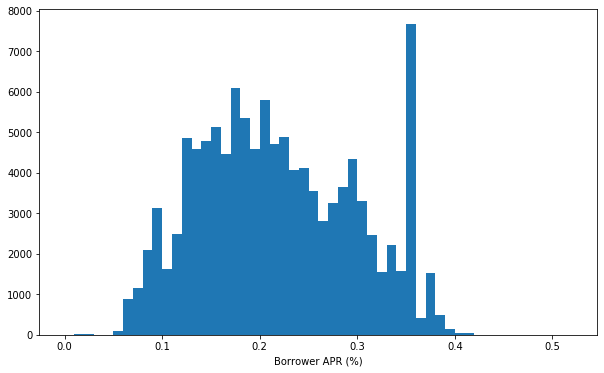

In [18]:
#Lets see the distribution of interest rates

binsize = 0.010
bins = np.arange(0, df_loan_sub['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR (%)')
plt.show()

> The distribution of APR is quite normal except the rate around 0.375 which has a high frequency. It would be interesting to outline the loan rates based on the listing categories.

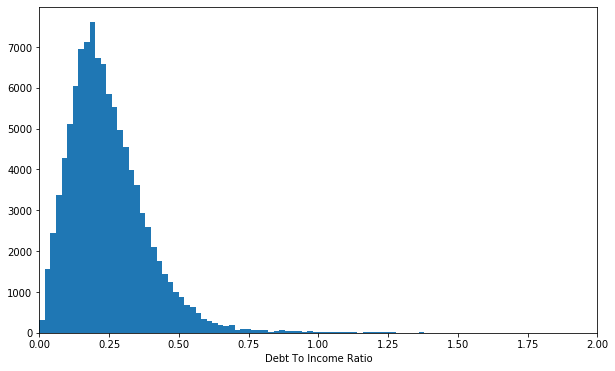

In [19]:
#Distribution of Debt to income ratio

binsize = 0.02
bins = np.arange(0, df_loan_sub['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim(0, 2)
plt.xlabel('Debt To Income Ratio')
plt.show()

> There is an outlier 10 in the distribution which needs to be rempved. The xlimits of the chart is set to get more details on the distribution. The distribution is right tailed with a peak around 0.25. Most of the borrowers has debt less than their income.

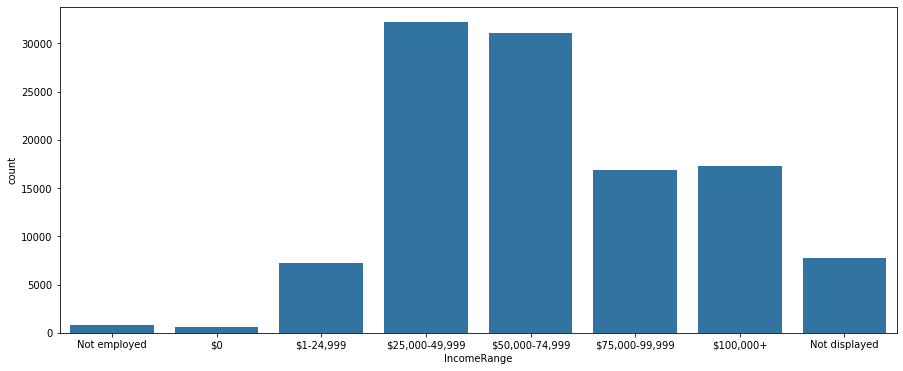

In [20]:
#Distribution of income range

#set the order of the incomes
level_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
               '$100,000+', 'Not displayed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loan_sub['IncomeRange'] = df_loan_sub['IncomeRange'].astype(ordered_cat)

plt.figure(figsize=[15, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_sub, x='IncomeRange', color= base_color);
#plt.xticks(rotation = 60);

>From the above plot we can say that major proportion of the borrowers are from the groups 25,000-49,999 and 50,000-74,999. 

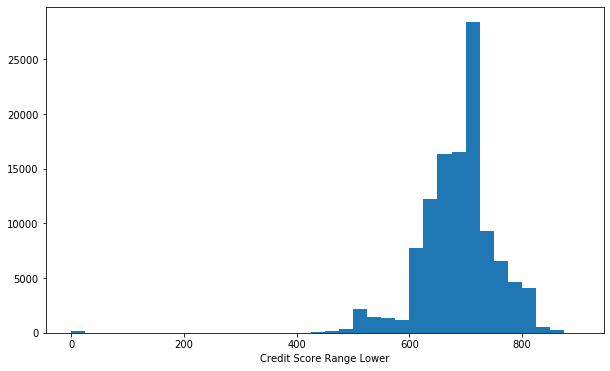

In [21]:
#Distribution of Credit score range lower

binsize = 25
bins = np.arange(0, df_loan_sub['CreditScoreRangeLower'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'CreditScoreRangeLower', bins = bins)
plt.xlabel('Credit Score Range Lower')
plt.show()

>The above plot shows the maximum number of borrowers have a credit score range lower at around 720.  

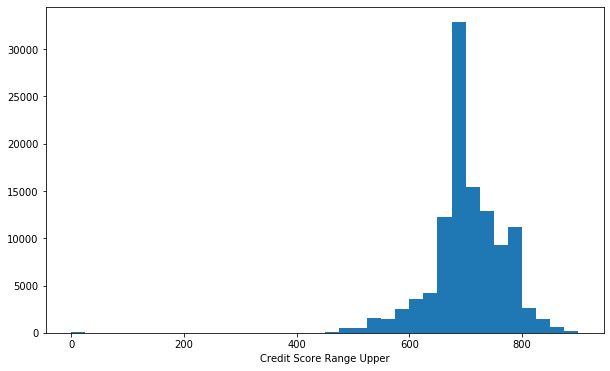

In [22]:
#Distribution of Credit score range Upper

binsize = 25
bins = np.arange(0, df_loan_sub['CreditScoreRangeUpper'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'CreditScoreRangeUpper', bins = bins)
plt.xlabel('Credit Score Range Upper')
plt.show()

>The above plot shows the maximum number of borrowers have a credit score range upper at around 700. The range of both upper and lower credit range is quite similar. It would be interesting to compare ranges for borrowers

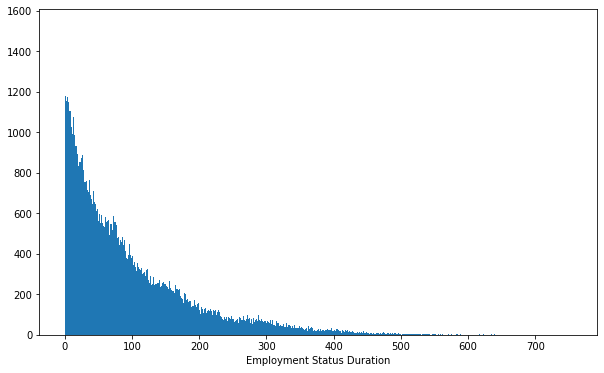

In [23]:
#Distribution of Employment Status Duration

binsize = 1
bins = np.arange(0, df_loan_sub['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'EmploymentStatusDuration', bins = bins)
#plt.xlim(0, 2)
plt.xlabel('Employment Status Duration')
plt.show()

>A right tailed distribution signifies that longer a person is employed, less likely that he/she will take loan.

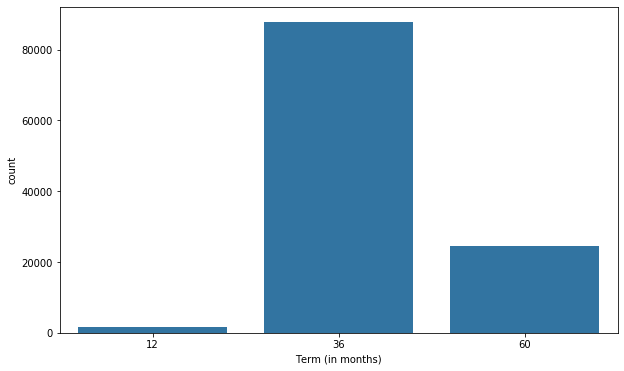

In [24]:
#Distribution of Term of Loan

plt.figure(figsize=[10, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_sub, x='Term', color= base_color)
plt.xlabel('Term (in months)');

>All loans are categorized int 3 terms only--12 months, 36 months, and 60 months. Highest number of loans were borrowed for a term of 36 months.

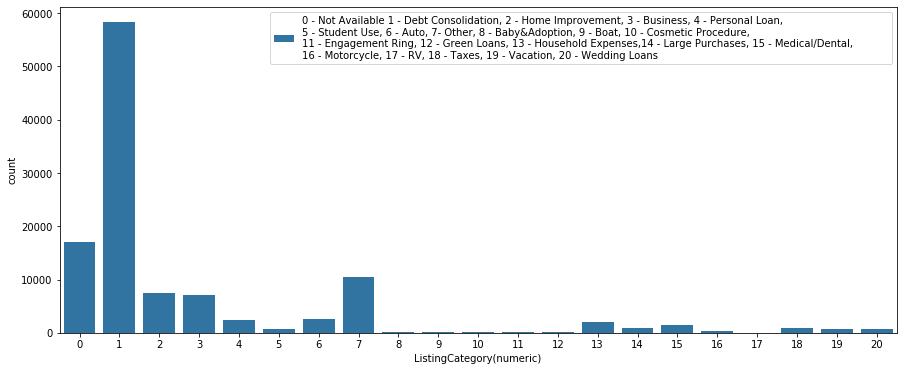

In [25]:
#Count of Listing category 

plt.figure(figsize=[15, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_sub, x='ListingCategory(numeric)', color= base_color)


plt.legend(['0 - Not Available 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, \
            \n5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure,\
           \n11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses,14 - Large Purchases, 15 - Medical/Dental,\
           \n16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans']);

>Most of the loans were for debt consolidation followed by Home improvement, business, and personal loan

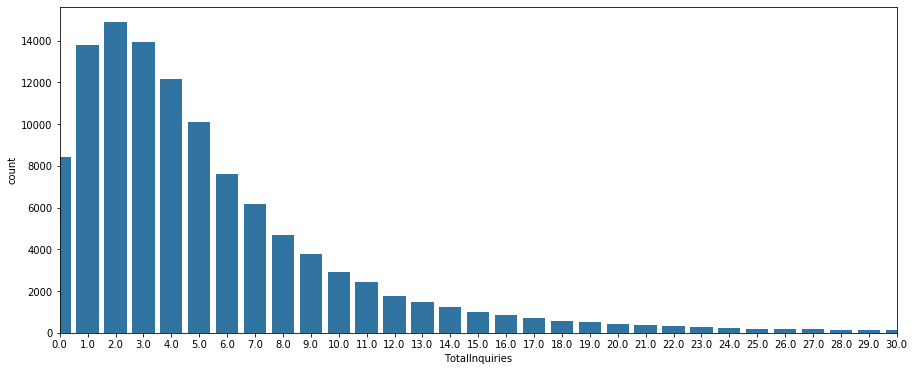

In [26]:
#Distribution of Total Inquiries

plt.figure(figsize=[15, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_sub, x='TotalInquiries', color= base_color)
plt.xlim(0, 30);


>Right skewed plot suggesting borrowers in general have lower inquiries

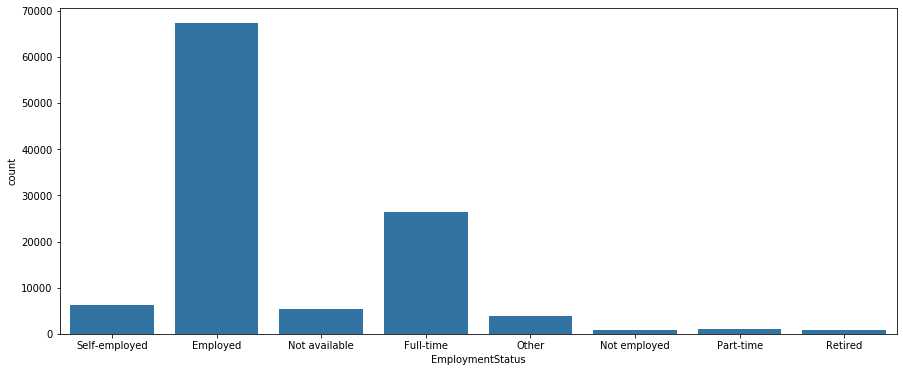

In [27]:
#Distribution of Employment status

plt.figure(figsize=[15, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_sub, x='EmploymentStatus', color= base_color);


> Most of the borrowers were working either self employed or employed by a firm. 

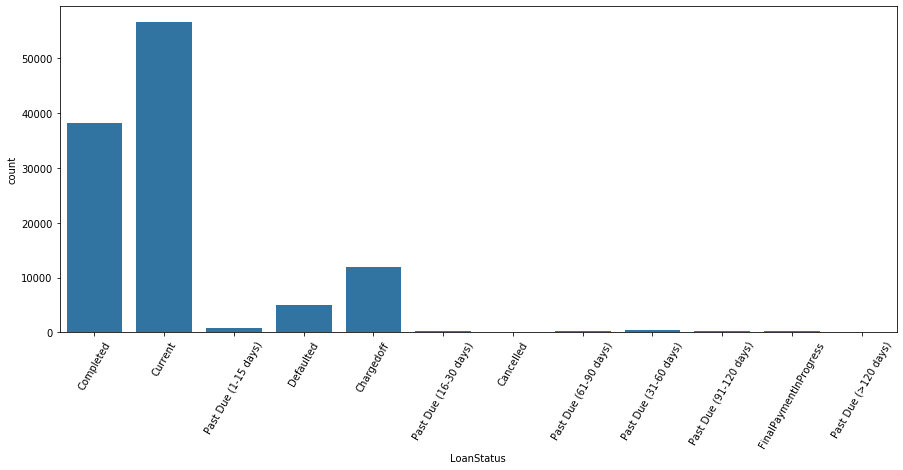

In [28]:
#Distribution of Loan status

plt.figure(figsize=[15, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=df_loan_sub, x='LoanStatus', color= base_color)
plt.xticks(rotation=60);

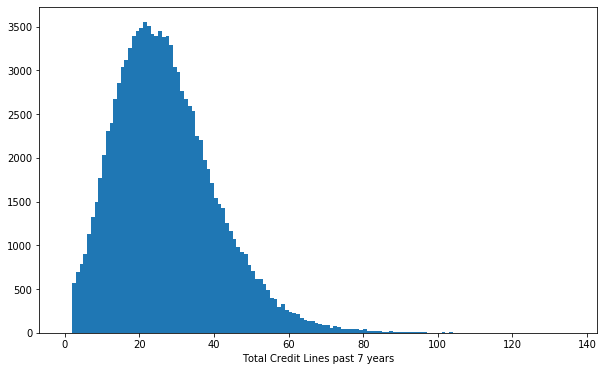

In [29]:
#Distribution of Total Credit Lines past 7 years

binsize = 1
bins = np.arange(0, df_loan_sub['TotalCreditLinespast7years'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'TotalCreditLinespast7years', bins = bins)
plt.xlabel('Total Credit Lines past 7 years')
plt.show()

>Right skewed plot with a peak around 25

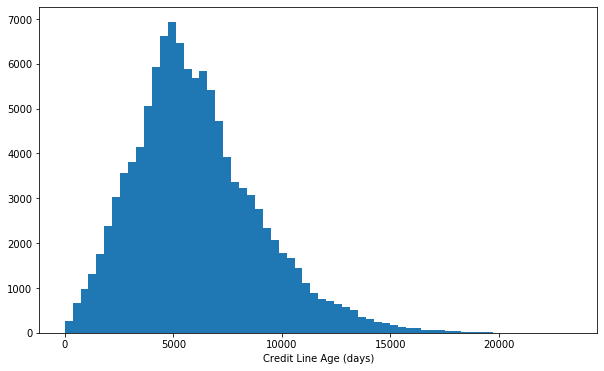

In [30]:
#Distribution of Credit line age

binsize = 365
bins = np.arange(0, df_loan_sub['CreditLineAge'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'CreditLineAge', bins = bins)
plt.xlabel('Credit Line Age (days)')
plt.show()

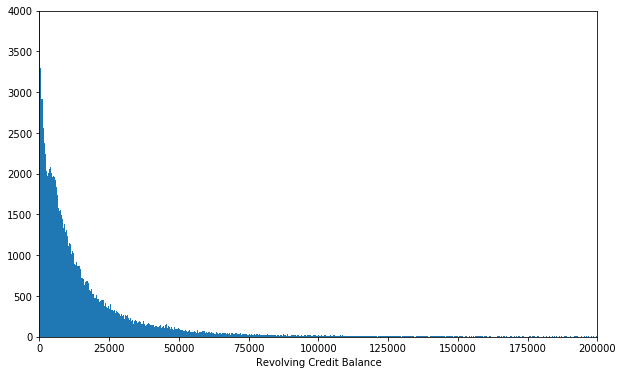

In [31]:
#Distribution of Revolving Credit Balance

binsize = 365
bins = np.arange(0, df_loan_sub['RevolvingCreditBalance'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan_sub, x = 'RevolvingCreditBalance', bins = bins)
plt.xlim(0, 200000)
plt.ylim(0, 4000)
plt.xlabel('Revolving Credit Balance')
plt.show()

>The above plot doesn't produce appropriate resolution and we can't judge the distribution. 
The plot is log transformed for Higher resolution

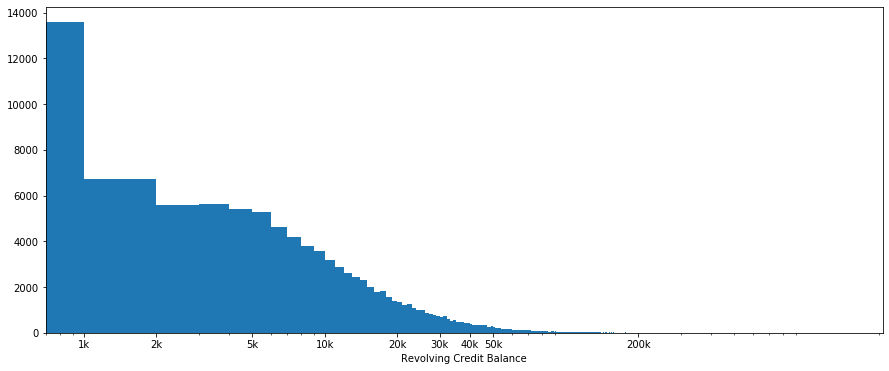

In [32]:
#Distribution of Revolving Credit Balance

binsize = 1000
bins = np.arange(0, df_loan_sub['RevolvingCreditBalance'].max()+binsize, binsize)

plt.figure(figsize=[15, 6])
plt.hist(data = df_loan_sub, x = 'RevolvingCreditBalance', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4, 5e4, 20e4], ['1k', '2k', '5k', '10k', '20k','30k', '40k','50k','200k'])
plt.xlabel('Revolving Credit Balance')
plt.show()

>Majority of the loans are below 1K and the number of loans sharply decline above 5K

In [33]:
#Map the states on a US map if possible

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Borrower APR is quite evenly distributed b/w 0.05 and 0.4 %. However a frequency of an interest rate of 0.375 can be noted.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Revolving credit balance data distribution was hard to read. Performed log transformation on the data to get more visibility. Also created new column for credit line age to understand the relationship b/w credit line age and other factors.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [34]:
numeric_vars = ['BorrowerAPR', 'EmploymentStatusDuration', 'CreditScoreRangeUpper', 
                'TotalCreditLinespast7years', 'TotalInquiries', 'RevolvingCreditBalance', 'CreditLineAge', 'DebtToIncomeRatio']

categoric_vars = ['IsBorrowerHomeowner', 'IncomeRange', 'Term', 'ListingCategory(numeric)', 'EmploymentStatus','LoanStatus']             
                
                

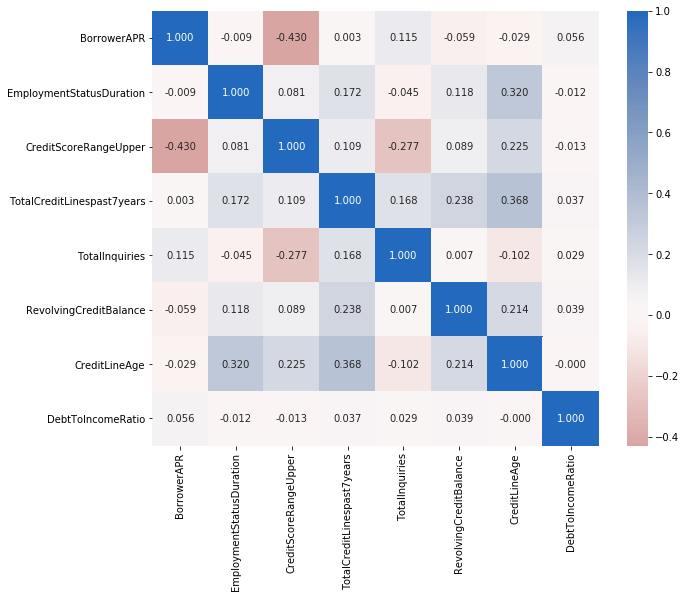

In [35]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(df_loan_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>The borrower APR is negatively correlated to the credit score and positively correlated with the number of inquiries. The Credit score is negatively correlated with total no. of inquiries and credit line age. These correlations will be further investigated in the following sections.

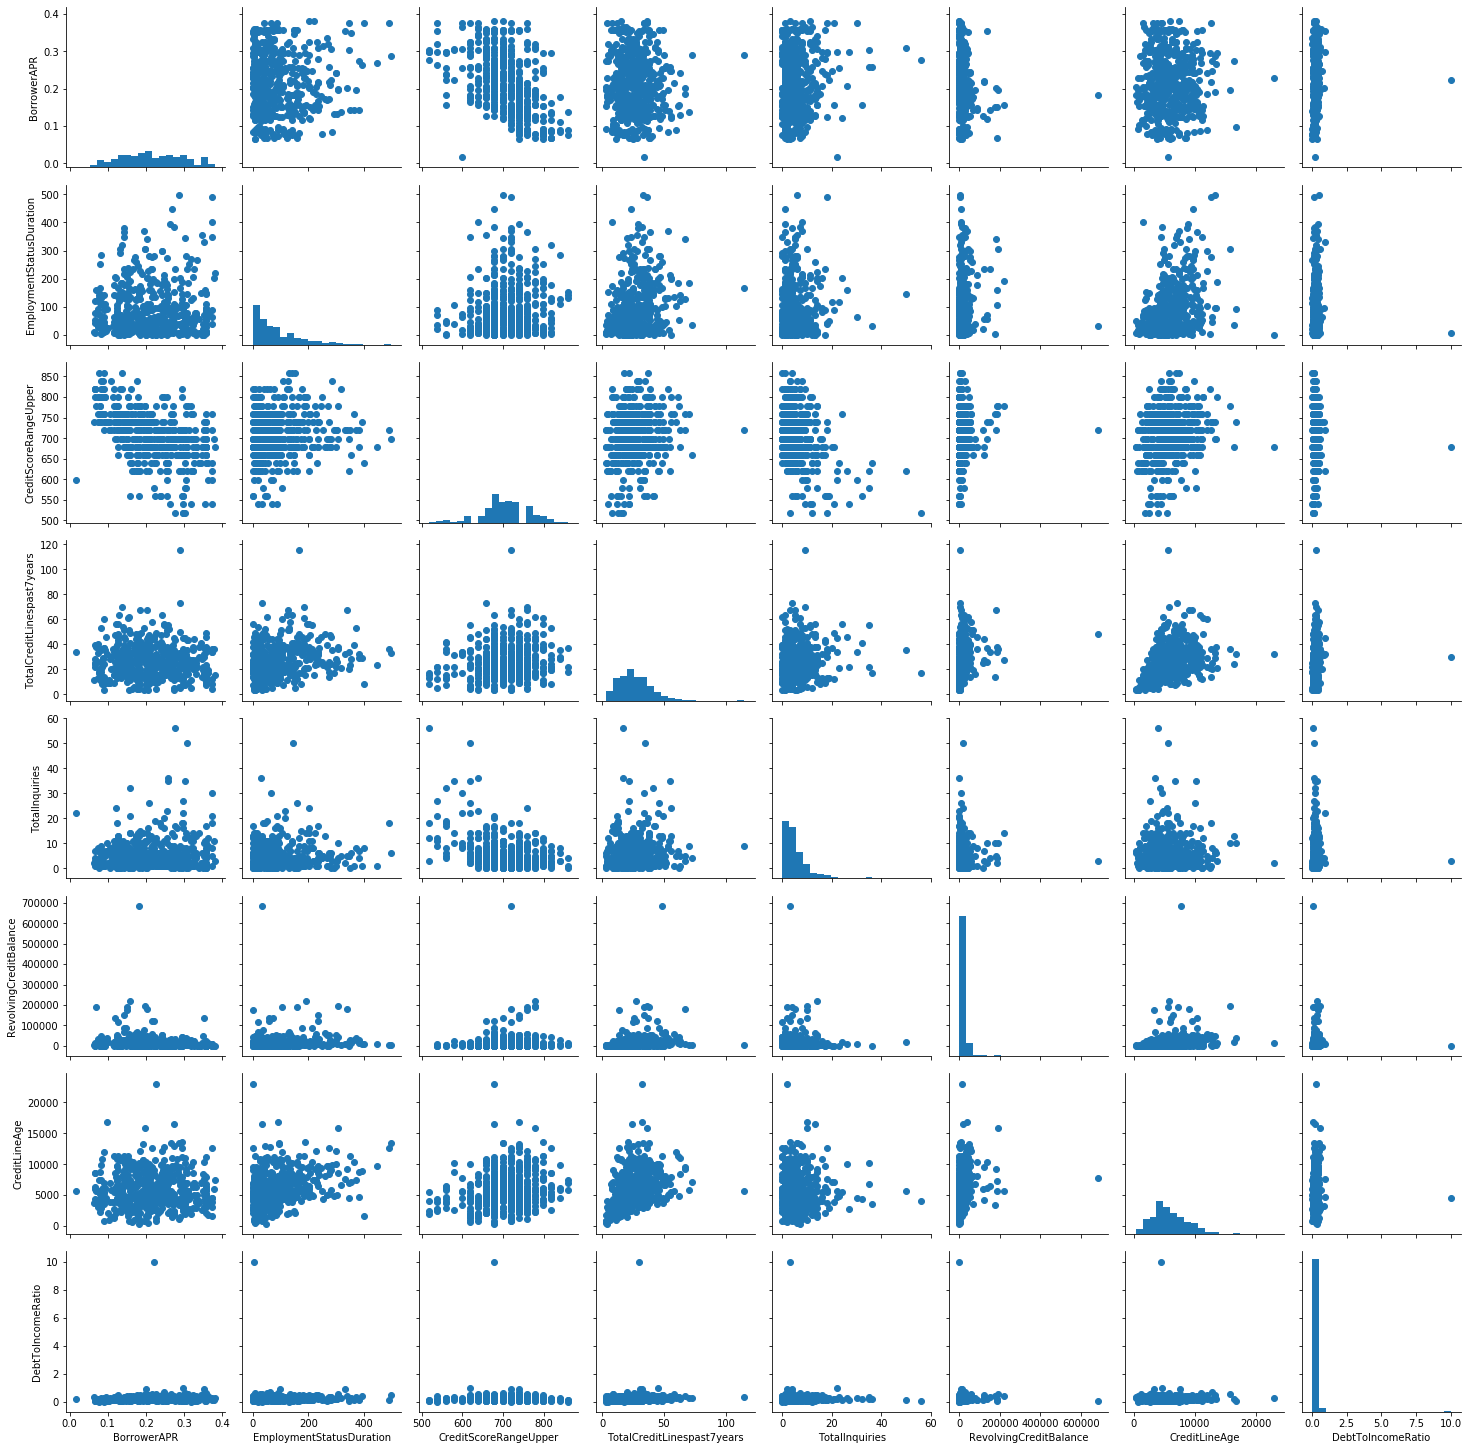

In [36]:
#the numeric variables are plotted against each other to understand the relationships b/w them
samples = np.random.choice(df_loan_sub.shape[0], 500, replace = False)
loan_samp = df_loan_sub.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> Following conclusions can be drawn from the above plot:
1. Strongest positive corelation exists b/w Total credit line age and total credit line in past 7 years
2. Correlation b/w quantitative variables doesn't seem strong enough to help us judge patterns. Therefore we would be looking into how our features of interest is affected by qualitative variables in the following section.


<Figure size 720x720 with 0 Axes>

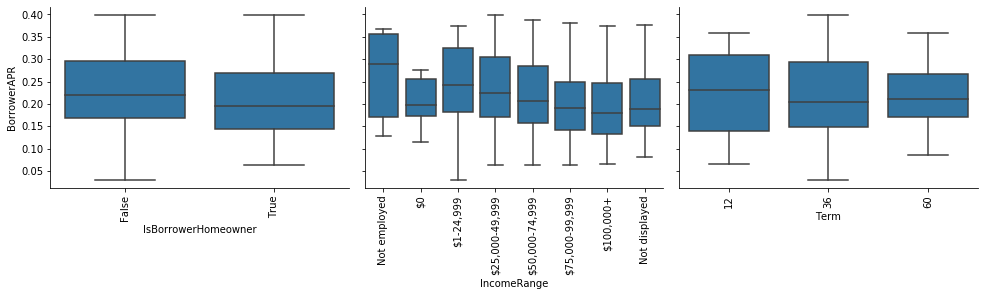

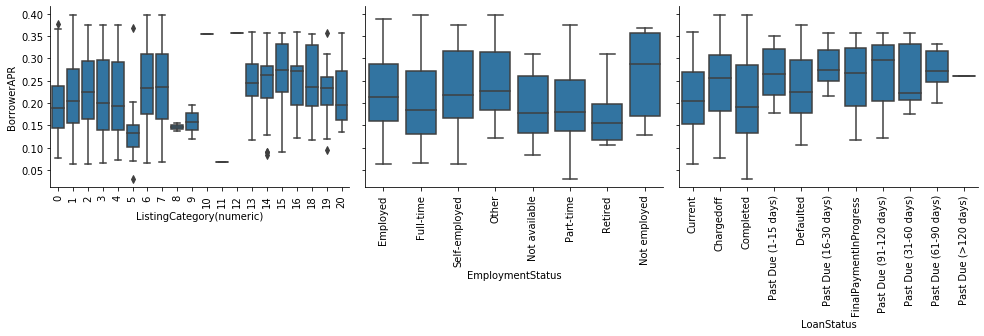

In [37]:
# 2 numerical variables Borrower APR and Credit score is plotted against the categorical variables to understand how
#qualitative data impacts them

samples = np.random.choice(df_loan_sub.shape[0], 2000, replace = False)
loan_samp2 = df_loan_sub.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [10, 10])
#columns = 2
g1 = sb.PairGrid(data = loan_samp2, y_vars = 'BorrowerAPR', x_vars = categoric_vars[0:3],
                size = 3, aspect = 1.5)
g2= sb.PairGrid(data = loan_samp2, y_vars = 'BorrowerAPR', x_vars = categoric_vars[3:7],
                size = 3, aspect = 1.5)
g1.map(boxgrid)
g2.map(boxgrid)
plt.show();

> Following inferences could be made on the above plots:
1. Median borrower APR is lower for homeowners.
2. Borrower APR usually decreases with increase in income range. Non-employed borrowers has a median APR of borrowers with income in the 1st bracket.
3. Median APR for term of 36 months is lower than terms of 12 and 60 months.
4. Personal loan(4) has the lowest median Borrower APR whereas Cosmetic procedure(10) and Dental/medical(15) loan has the highest Borrower APR.
5. In general, employed and retired borrowers have lower Borrower APR and Non-employed borrowers have to borrow at higher rate.
6. It is quite interesting to note that loans which are charged-off, defaulted, and past due has higher Borrower APR in general whereas the completed or the loans with Final payment in progress has high Borrower APR. 

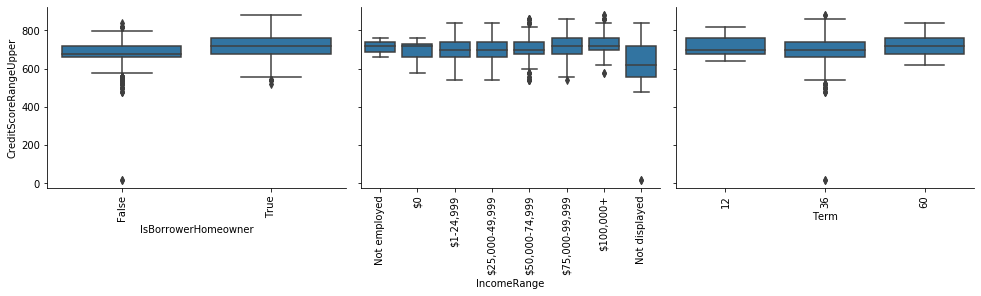

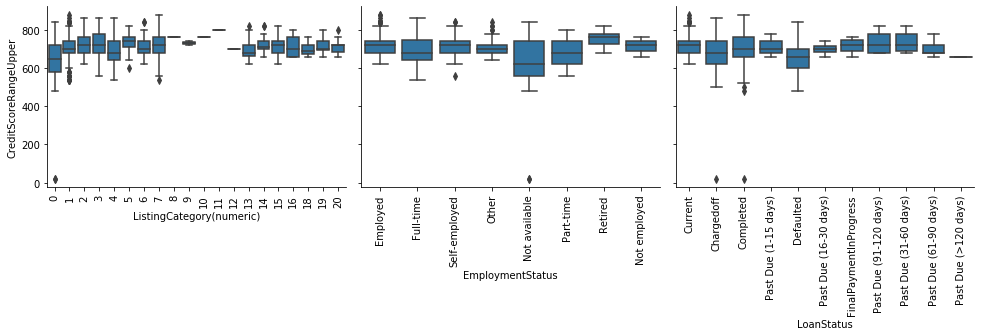

In [38]:
g3 = sb.PairGrid(data = loan_samp2, y_vars = 'CreditScoreRangeUpper', x_vars = categoric_vars[0:3],
                size = 3, aspect = 1.5)
g4= sb.PairGrid(data = loan_samp2, y_vars = 'CreditScoreRangeUpper', x_vars = categoric_vars[3:7],
                size = 3, aspect = 1.5)
g3.map(boxgrid)
g4.map(boxgrid)
plt.show();

> Following conclusions could be made on the above plots:
1. Homeowners have high median creditscores
2. Creditscores in general increase with income. Borrowers with no income has high credit score. These borrowers could be the one who is borrowing for the first time and has a default score. This could be verified by checking the credit line age of these borrowers.
3. Borrowers with high median credit score gets a longer term on their loan.
4. Borrowers who take a personal loan(5) has the lowest median credit score however, it is also true that the personal loan borrowers also get lower APR. This would be investigated in multivariate analysis. Credit score of borrowers taking loan for Baby and adoption has highest median credit score.
5. Both part time and full time employees has lowest median credit score whereas borrowers with employed or retired employment status has similar median credit score.
6. All bad debts-Charged off, Defaulted loan borrowers had low median credit score. whereas the ones which are completed or in Final payment had higher credit score. This signifies the credit score can be a strong indicator of whether a loan would be paid off or not.

### Risky loans and good loans
> Plot completed and defaulted loans based on listing category, Home ownership, Income range, Income to Debt ratio to understand which loans get paid up and which ones turn out to be bad loans

In [60]:
#Subset the dataframe to contain Loan status Completed, Defaulted, Chargedoff

df_loan_status = df_loan_sub[df_loan_sub['LoanStatus'].str.contains("Completed|Defaulted|Chargedoff")]

#Function to plot different categorical variables on loan status

def status_plot(x, **kwargs):
    plt.figure(figsize = [10, 8])
    f, axes = plt.subplots(1,2,figsize=(16,10))
    sb.countplot(data = df_loan_status, x = x, hue = 'LoanStatus', palette = 'Blues', ax=axes[0])
    props = df_loan_status.groupby(x)['LoanStatus'].value_counts(normalize=True).unstack()
    props.plot(kind='bar', stacked='True', ax=axes[1]);


<Figure size 720x576 with 0 Axes>

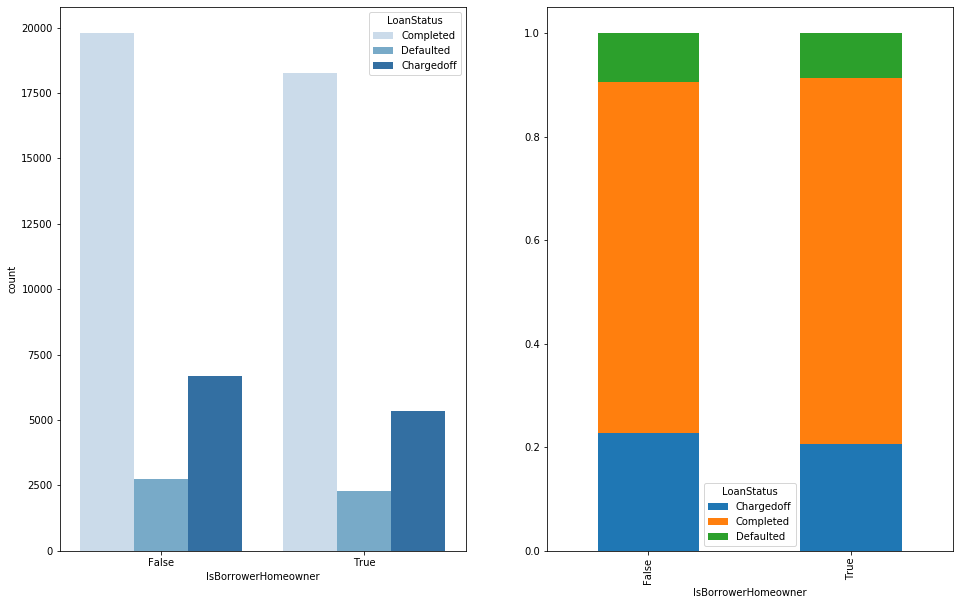

In [61]:
#count and proportion of loans as per their status distributed by homeowner or not

status_plot(x= 'IsBorrowerHomeowner')


<Figure size 720x576 with 0 Axes>

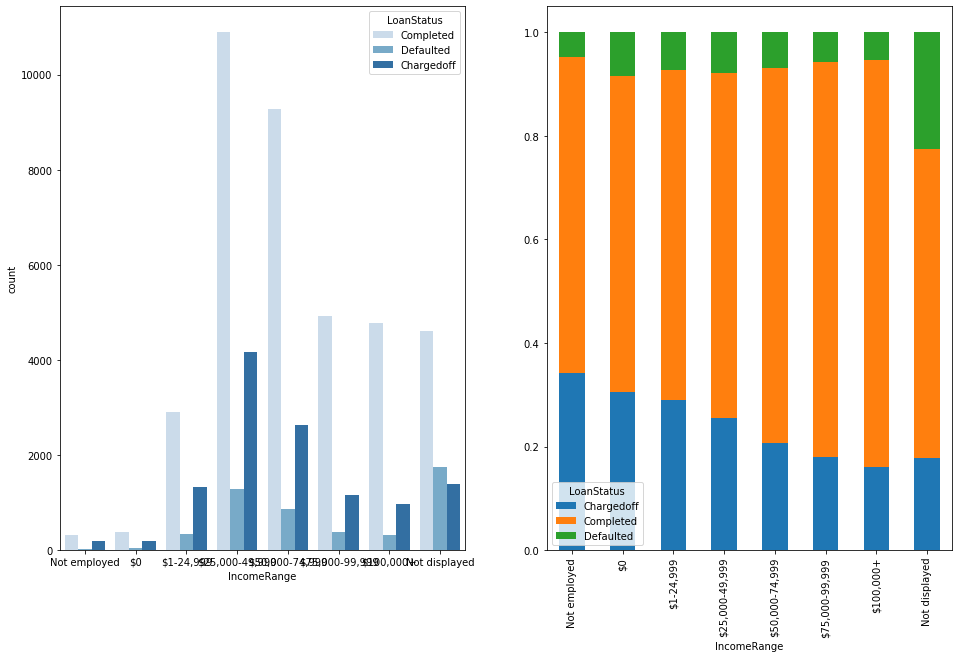

In [51]:
#count and proportion of loans as per their status distributed by income range

status_plot(x = 'IncomeRange')

<Figure size 720x576 with 0 Axes>

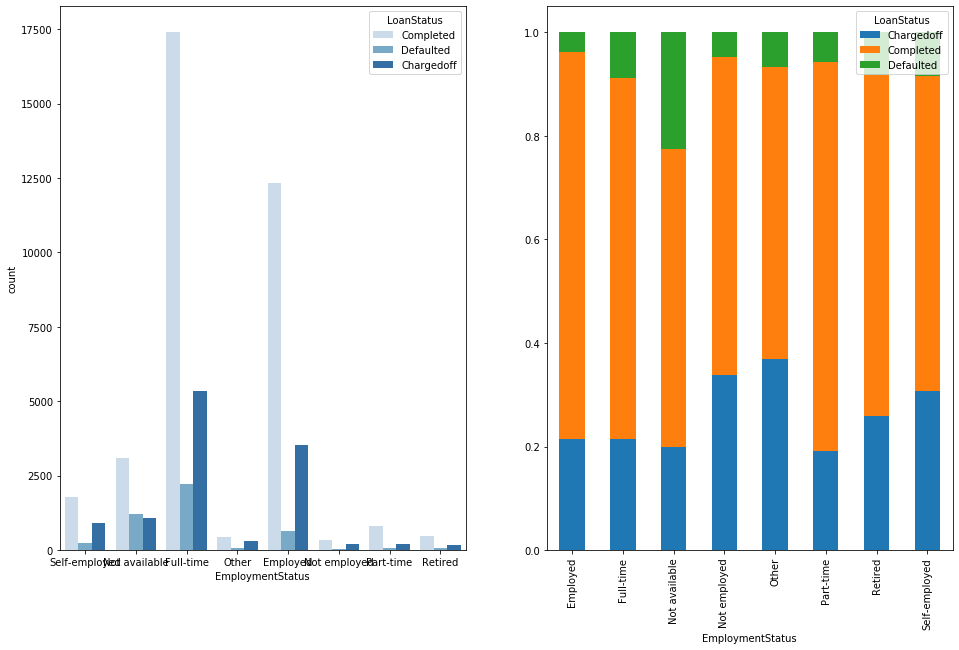

In [62]:
#count and proportion of loans as per their status distributed by Employment status

status_plot(x = 'EmploymentStatus')

<Figure size 720x576 with 0 Axes>

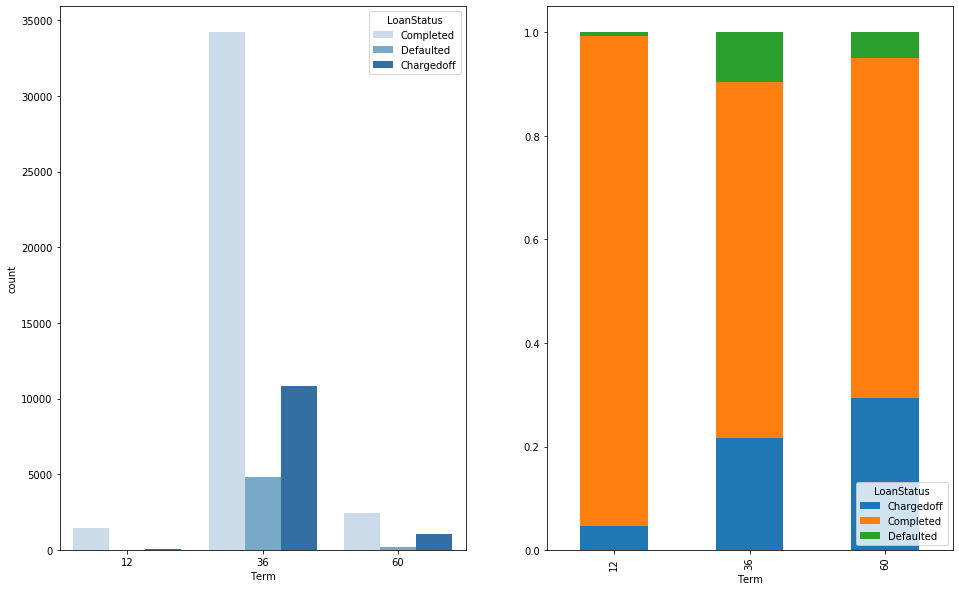

In [63]:
#count and proportion of loans as per their status distributed by Term of loan

status_plot(x = 'Term')

<Figure size 720x576 with 0 Axes>

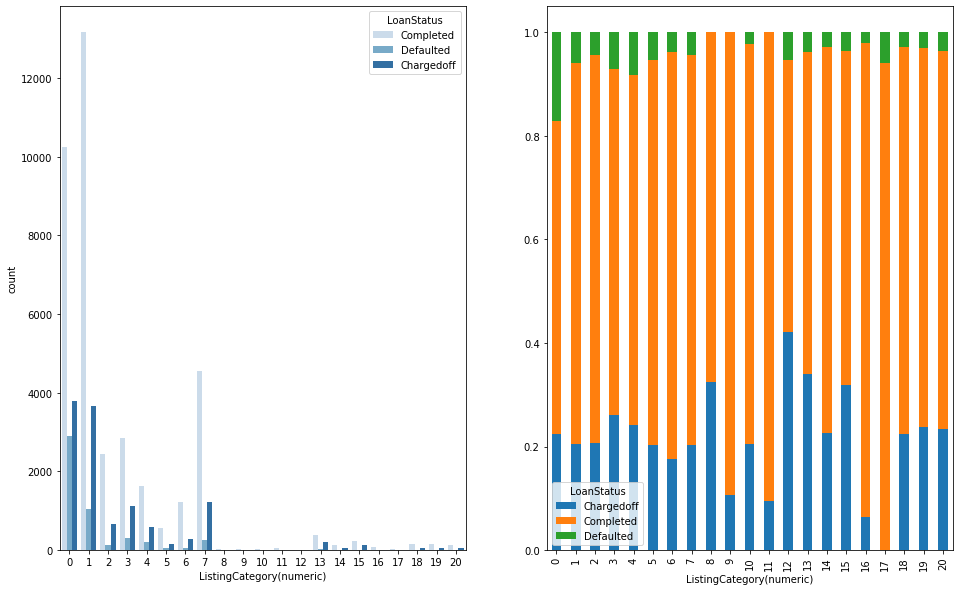

In [64]:
#count and proportion of loans as per their status distributed by Listing category of the loan
status_plot(x = 'ListingCategory(numeric)')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> An effort was made to understand the type of loans which were paid off and the ones which were not.Following observations were made.
1. Non-Home owners are slightly more likely to default or get charged off
2. It can be noted that the chance of a loan being paid off increases with the income range which is expected. 
3. On the basis of employment status it is interesting to note that the borrowers whose status is not available or not defined properly and falls in other category has the highest chance of defaulting and getting charged off respectively. Therefore, getting details on employment status is one of the most important factors in risk analysis.
4. Default probability is pretty high for a 36 months term whereas 60 months term has the highest charged off percentage.
5. Green Loans(12) are the riskiest in terms of being charged off and has quite a significant default rate. However, Personal loan(4) has the highest default rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It should be noted that loans become risky i.e., has high chance of turning into bad debt in cases where either data is not displayed, or is not available. We can conclude from this observation that information such as employment status, income range is absolutely vital to find out whether a loan could be paid off or not.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

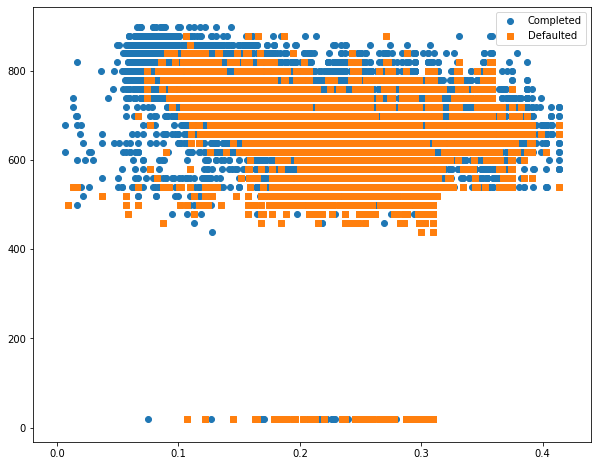

In [67]:
#plot the loan status versus Borrower APR with Loan status color encoded

plt.figure(figsize = [10, 8])

cat_markers = [['Completed', 'o'],
               ['Defaulted', 's']]

for cat, marker in cat_markers:
    df_cat = df_loan_status[df_loan_status['LoanStatus'] == cat]
    plt.scatter(data = df_cat, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', marker = marker)
plt.legend(['Completed','Defaulted']);

> The above plot is an enxample of overplotting and doesn't give us an idea of the underlying pattern. We will take a sample of 5000 observations for our next plot.

In [93]:
samples = np.random.choice(df_loan.shape[0], 5000, replace = False)
loan_samp3 = df_loan.loc[samples,:]

#function to plot scatter plots b/w numeric variables

def scatter(x, y):
    plt.figure(figsize = [15, 10])
    cat_markers = [['Completed', 'o'], ['Defaulted', 's']]

    for cat, marker in cat_markers:
        df_cat = loan_samp3[loan_samp3['LoanStatus'] == cat]
        plt.scatter(data = df_cat, x = x, y = y, marker = marker, alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(['Completed','Defaulted']);

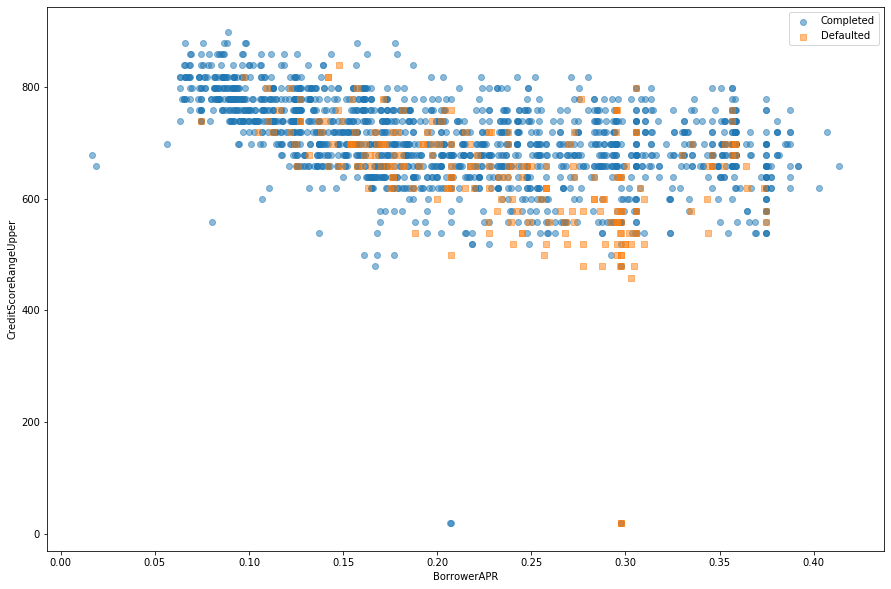

In [94]:
#Scatter plot b/w Borrower APR and Creditscore

scatter('BorrowerAPR', 'CreditScoreRangeUpper')

> The plot shows usually low credit score borrowers with high APR mostly default 
however, it is strange to notice that some borrowers even with high credit scores get loan at high APR and default out.

(0, 40)

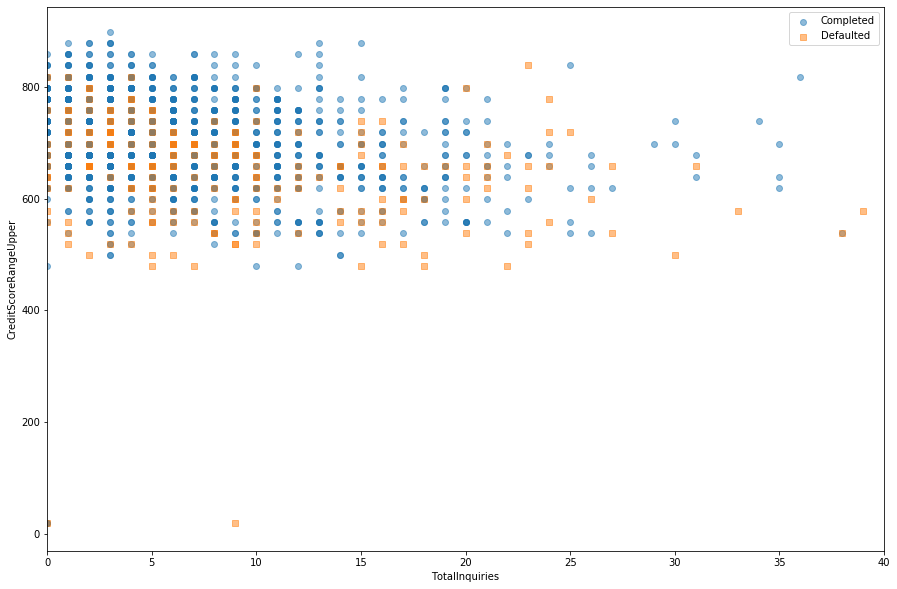

In [106]:
scatter('TotalInquiries', 'CreditScoreRangeUpper')
plt.xlim(0,40)

> Total Inquiries is the next strongly correlated variable to BorrowerAPR. Plotting it against credit scores we find that there are few high credit score borrowers who has high number of inquiries. These inquiries earns them High APR and eventually they default.

(0, 1)

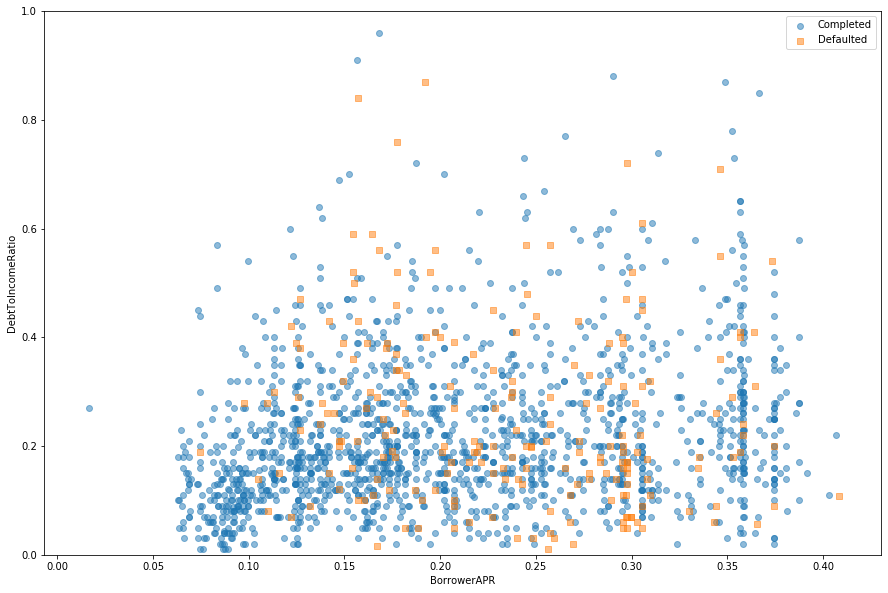

In [95]:
scatter(x = 'BorrowerAPR', y = 'DebtToIncomeRatio')
plt.ylim(0,1)

>Debt to income ratio doesn't seem to have any impact on status of the loan.

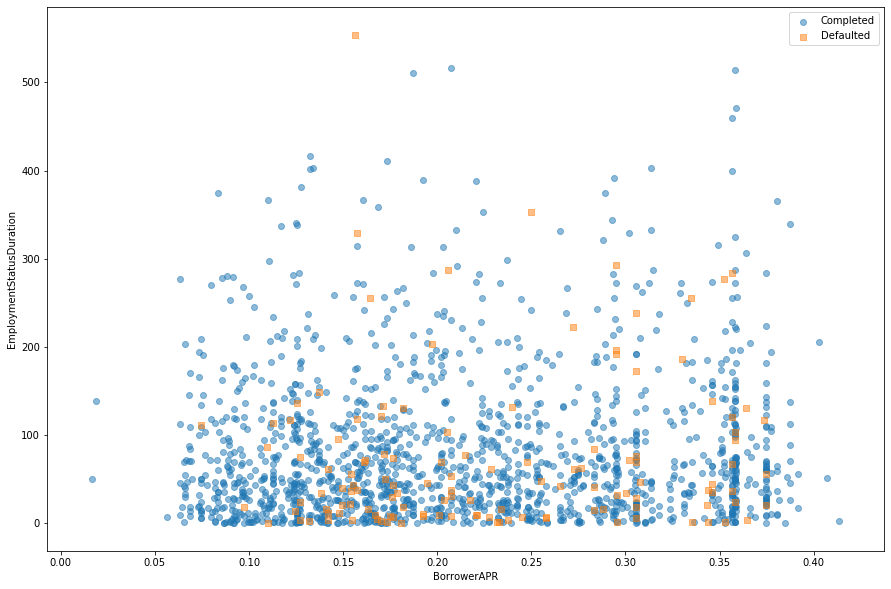

In [96]:
scatter(x = 'BorrowerAPR', y = 'EmploymentStatusDuration')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the above plots it could be said that defaulters have the following characteristics
1. Low credit score
2. Shorter Employment status duration
3. High borrower rate

### Were there any interesting or surprising interactions between features?

> On plotting, credit scores on borrower APR we found that there were quite a few borrowers who had high credit scores yet they got loans at high APR. Since, Total Inquiries is the next strongly correlated variable to BorrowerAPR. Plotting it against credit scores we find that there are few high credit score borrowers who has high number of inquiries. These inquiries earns them High APR and eventually they default.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!